In [285]:
import numpy as np
import pandas as pd
from math import *
import math

In [286]:
# n equal to number of features
n = 5

# m equal to number of samples
m = 100

In [287]:
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

## Kmeans

In [288]:
class Clustering:
    def __init__(self, path='accounts_style.csv' ):
        self.path = path
        self.data = self.__preprecessing(path)
        self.data = self.__normalize_based_on_values([2.8, 2.25, 1.7, 1.35, 1.85])
        

    def row_processing(self, data):
        #print(self.data)
        #select special part of the dataframe
        data = data.iloc[ : ,2:]

        #spilit data and add new culomns
        data[['Age1', 'Age2', 'Age3']] = data["Age"].str.split(",", n=2, expand=True)
        data[['Color1', 'Color2', 'Color3']] = data["Color"].str.split(",", n=2, expand=True)
        data[['Pattern1', 'Pattern2', 'Pattern3']] = data["Pattern"].str.split(",", n=2, expand=True)
        data[['Size1', 'Size2', 'Size3']] = data["Size"].str.split(",", n=2, expand=True)
        data[['Formal1', 'Formal2', 'Formal3']] = data["Formal"].str.split(",", n=2, expand=True)

        #drop unusage columns
        data.drop(columns =['Age', 'Color', 'Pattern', 'Size', 'Formal'], inplace = True)

        #convert type from str to float64
        data = data.astype('float64')

        #calculate the average of each row specialy
        data['Age_avg'] = self.__special_mean(data[['Age1', 'Age2', 'Age3']].values,20)
        data['Color-avg'] = self.__special_mean(data[['Color1', 'Color2', 'Color3']].values,20)
        data['Pattern_avg'] = self.__special_mean(data[['Pattern1', 'Pattern2', 'Pattern3']].values,20)
        data['Size-avg'] = self.__special_mean(data[['Size1', 'Size2', 'Size3']].values,20)
        data['Formal_avg'] = self.__special_mean(data[['Formal1', 'Formal2', 'Formal3']].values,20)
        
        #drop unusage columns
        data.drop(columns =['Age1', 'Age2', 'Age3', 'Color1', 'Color2', 'Color3', 'Pattern1',
         'Pattern2', 'Pattern3', 'Size1', 'Size2', 'Size3', 'Formal1', 'Formal2', 'Formal3'], inplace = True)
         
        data = self.preprocess.transform(data)
        data = pd.DataFrame(data, columns=['Age_avg', 'Color_avg', 'Pattern_avg', 'Size_avg', 'Formal_avg'])
        data = (data - 0.5) * 2
        return data



    def getData(self):
        return self.data


    def fit_predict(self, n_clusters=6):
        kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42)
        self.kmeans = kmeans
        return kmeans.fit_predict(self.data)


    def cluster_centers(self):
        return self.kmeans.cluster_centers_



    def predict(self, input):
        return self.kmeans.predict(input)

    
    def __preprecessing(self, path):
        #select special part of the dataframe
        data = pd.read_csv(path)
        data = data.iloc[ : ,2:]
        #print(data)

        #spilit data and add new culomns
        data[['Age1', 'Age2', 'Age3']] = data["Age"].str.split(",", n=2, expand=True)
        data[['Color1', 'Color2', 'Color3']] = data["Color"].str.split(",", n=2, expand=True)
        data[['Pattern1', 'Pattern2', 'Pattern3']] = data["Pattern"].str.split(",", n=2, expand=True)
        data[['Size1', 'Size2', 'Size3']] = data["Size"].str.split(",", n=2, expand=True)
        data[['Formal1', 'Formal2', 'Formal3']] = data["Formal"].str.split(",", n=2, expand=True)

        #drop unusage columns
        data.drop(columns =['Age', 'Color', 'Pattern', 'Size', 'Formal'], inplace = True)

        #convert type from str to float64
        data = data.astype('float64')

        #calculate the average of each row specialy
        data['Age_avg'] = self.__special_mean(data[['Age1', 'Age2', 'Age3']].values,20)
        data['Color_avg'] = self.__special_mean(data[['Color1', 'Color2', 'Color3']].values,20)
        data['Pattern_avg'] = self.__special_mean(data[['Pattern1', 'Pattern2', 'Pattern3']].values,20)
        data['Size_avg'] = self.__special_mean(data[['Size1', 'Size2', 'Size3']].values,20)
        data['Formal_avg'] = self.__special_mean(data[['Formal1', 'Formal2', 'Formal3']].values,20)

        #drop unusage columns
        data.drop(columns =['Age1', 'Age2', 'Age3', 'Color1', 'Color2', 'Color3', 'Pattern1',
         'Pattern2', 'Pattern3', 'Size1', 'Size2', 'Size3', 'Formal1', 'Formal2', 'Formal3'], inplace = True)
        return data


    def print_n_cluster(self):
        wcss = []
        for i in range(1, 11):
            kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
            kmeans.fit(self.data)
            wcss.append(kmeans.inertia_)
        plt.plot(range(1, 11), wcss)
        plt.title('The Elbow Method')
        plt.xlabel('Number of clusters')
        plt.ylabel('WCSS')
        plt.show()


    def __normalize_based_on_values(self, values):
        #normalize data from 0 to 1
        self.values = values
        preprocess = Normalizer().fit(self.data)
        inputData = preprocess.transform(self.data)
        normalized_data = pd.DataFrame(inputData, columns=self.data.columns)
        self.preprocess = preprocess

        #put it in -1 to +1
        normalized_data = (normalized_data - 0.5) * 2

        #change the period for each component to change the influence
        normalized_data = normalized_data * values
        return normalized_data


    def __special_mean(self, selectedClothes, anomaly):
        # we have to ignore anomaly values in each component to have accessed the real mean value
        meanVector = []
        for i in range(np.shape(selectedClothes)[0]):
            componentSum = 0
            count = 0
            for j in range(np.shape(selectedClothes)[1]):
                if(selectedClothes[i][j] != anomaly):
                    componentSum += selectedClothes[i][j]
                    count += 1
            meanVector.append(componentSum/count)

        return meanVector




## recommend

In [289]:
class RecommendationSystem:
    
    def __init__(self, allClothes):
        self.allClothes = allClothes
        self.clustering = Clustering(path='accounts_style.csv')
        self.answers = self.clustering.fit_predict(n_clusters=6)
        self.preparedDataWithAnswers = self.clustering.getData()
        self.preparedDataWithAnswers.insert(0, 'Id', range(1,401))
        self.preparedDataWithAnswers['Answers'] = self.answers


    def print_n_cluster(self):
        self.clustering.print_n_cluster()

    def get_prepared_data_with_anwers(self):
        return self.preparedDataWithAnswers

    def recommend_based_on_questions(self, values, customer_feature1, customer_feature2, customer_feature3, customer_feature4, k1 = 4, k2=1, k3=1, k4=1):
    
        #k nearest neighbor
        k_indices1 = self.__one_recommend(customer_feature1, values, k1)
        k_indices2 = self.__one_recommend(customer_feature2, values, k2)
        k_indices3 = self.__one_recommend(customer_feature3, values, k3)
        k_indices4 = self.__one_recommend(customer_feature4, values, k4)
                
        # merge and unigue indices(union)
        k_indices = np.append(k_indices1, np.append(k_indices2, np.append(k_indices3, k_indices4)))
        
        # return the selected style indices 
        return k_indices


    def upddate_all_clothes(self, clothes):
        self.allClothes = clothes
        return 1


    def recommend_based_on_clothes(self, selectedClothes, values, anomaly = 20, k=5):
        #asume average of the each component for the as the customer vector of self.__oneRecommend little diffrent with the ordinary averages
        average_of_multi_tags = self.__special_mean(selectedClothes, anomaly)
        k_indeces = self.__one_recommend(average_of_multi_tags, values, k)
        return k_indeces


    def recommend_based_on_cluster(self, cluster_taste, k=30):
        tasteSum = sum(cluster_taste)
        selected_indices = []
        for i in range(len(cluster_taste)):
            selected_indices.append(self.__k_recommend_recommend_based_on_cluster(i, math.ceil(k*cluster_taste[i]/tasteSum)))
        selected_indices = self.__flatten(selected_indices)
        random.shuffle(selected_indices)    
        return selected_indices



    def add_item(self, clothes, id):
        clothes = pd.DataFrame(clothes, columns=['Id','Url','Age','Color','Pattern','Size','Formal'])
        clothes = self.clustering.row_processing(clothes)
        answer = self.clustering.predict(clothes)
        clothes['Answers'] = answer
        clothes.insert(0, 'Id', id)
        self.preparedDataWithAnswers.append(clothes)
        return 1


    def __k_recommend_recommend_based_on_cluster(self, ind, k):
        indices = self.preparedDataWithAnswers[~self.preparedDataWithAnswers.where(self.preparedDataWithAnswers['Answers'] == ind)['Answers'].isnull()]['Id'].values
        rndIndices = random.sample(list(indices), k)
        print(rndIndices)
        return rndIndices


    def __one_recommend(self, customer, values, k):
        # compute distances by one of the distance(distance_1, distance_2, ...) functions
        distances = np.array([self.__similarity2(customer, f, values) for f in self.allClothes])
        
        # return k nearest style indices
        return np.argsort(distances)[: k]


    def __flatten(self, t):
        return [item for sublist in t for item in sublist]


    def normal_recommend_question2(self):
        question2Indices = []
        for i in range(0,6):
            oneClusterIndices = self.preparedDataWithAnswers[~self.preparedDataWithAnswers.where(self.preparedDataWithAnswers['Answers'] == i)['Answers'].isnull()]['Id'].values
            question2Indices.append(random.choice(oneClusterIndices))
        return question2Indices
    

    def update_cluster_taste(self, prev_cluster_taste, comment, clothesInd, alpha = 0.2 ):
        #find the class number of clothes
        clusterNumber = self.which_cluster(clothesInd)
        #calculate the new replacement for selected cluster with weighted average
        weightedAverage = np.average([prev_cluster_taste[clusterNumber], comment], weights=[1,alpha])

        #update prev_Cluster_taste 
        prev_cluster_taste[clusterNumber] = weightedAverage
        return prev_cluster_taste


    def favorite_items(inputmatrix):
        items = pd.DataFrame(inputmatrix, columns=['id', 'average', 'count'])
        items['average'] = 0.5 *(2*items['average']).apply(np.ceil)
        items.sort_values(['average', 'count'], inplace=True, ascending=False)
        return items.values


    def which_cluster(self, clothesInd):
        return self.preparedDataWithAnswers[~self.preparedDataWithAnswers.where(self.preparedDataWithAnswers['Id'] == clothesInd )['Answers'].isnull()]['Answers'].values[0]


    def __similarity1(self, customer, clothes, values):
        lowestMines = self.__lowest_mines(customer, clothes)      
        return np.sum(values * np.abs(lowestMines))
    
    
    def __similarity2(self, customer, clothes, values):
        lowestMines = self.__lowest_mines(customer, clothes)      
        return np.sqrt(np.sum(values*((lowestMines) ** 2 )))


    def __lowest_mines(self, customer, clothes):
        bestClothes = []
        tmpArray1 = []
        for i in range(len(customer)):
            for j in range(np.shape(clothes)[1]):
                tmpArray1.append(abs((customer[i] - clothes[i][j])))
            bestClothes.append(min(tmpArray1))  
            tmpArray1 = []
        return np.array(bestClothes)


    def __special_mean(self, selectedClothes, anomaly):
        # we have to ignore anomaly values in each component to have access the real mean value
        meanVector = []
        for i in range(np.shape(selectedClothes)[0]):
            componentSum = 0
            count = 0
            for j in range(np.shape(selectedClothes)[1]):
                if(selectedClothes[i][j] != anomaly):
                    componentSum += selectedClothes[i][j]
                    count += 1
            meanVector.append(componentSum/count)

        return meanVector
            

### 1.Test of recommend_based_on_questions function 
---
creating random data and check the answers of recommend_based_on_questions function, subfunctions.
its subfuctions including:
- __similarity2
- __lowest_mines
- __one_recommend



In [290]:
import random 

In [291]:
#create random clothes tags
my_list = [0, 1, 2, 3, 4]
clothes = np.zeros((m, n, 3))
for i in range(m):
    for j in range(n):
        for k in range(3):
            clothes[i, j, k] = random.choice(my_list)
    
print(clothes[:2])

[[[3. 4. 2.]
  [3. 4. 2.]
  [0. 4. 3.]
  [2. 4. 0.]
  [0. 0. 2.]]

 [[3. 0. 2.]
  [0. 0. 1.]
  [2. 1. 3.]
  [4. 0. 4.]
  [0. 1. 1.]]]


In [292]:
#create random personal tags
customer1 = np.array([random.choice(my_list) for j in range(n)])

#create 3 random selected style tags
customer2 = np.array([random.choice(my_list) for j in range(n)])
customer3 = np.array([random.choice(my_list) for j in range(n)])
customer4 = np.array([random.choice(my_list) for j in range(n)])
print(customer1, customer2, customer3, customer4)

[1 0 1 1 2] [2 2 4 4 0] [1 1 1 2 1] [2 4 2 4 1]


In [293]:
recommendationSystem = RecommendationSystem(clothes)

distances_indices = recommendationSystem.recommend_based_on_questions([1,1,1,1,1], customer1, customer2, customer3, customer4)

In [294]:
print(customer1)
print(clothes[distances_indices])
type(distances_indices)

[1 0 1 1 2]
[[[2. 0. 1.]
  [0. 0. 0.]
  [1. 2. 1.]
  [0. 3. 1.]
  [1. 2. 3.]]

 [[1. 2. 3.]
  [2. 4. 0.]
  [1. 3. 4.]
  [1. 2. 0.]
  [2. 1. 2.]]

 [[2. 1. 4.]
  [2. 1. 0.]
  [2. 1. 2.]
  [0. 1. 0.]
  [2. 4. 3.]]

 [[1. 4. 3.]
  [4. 4. 0.]
  [4. 4. 1.]
  [4. 2. 1.]
  [1. 2. 0.]]

 [[3. 4. 2.]
  [3. 4. 2.]
  [0. 4. 3.]
  [2. 4. 0.]
  [0. 0. 2.]]

 [[1. 1. 4.]
  [0. 4. 1.]
  [0. 1. 2.]
  [4. 2. 0.]
  [3. 2. 2.]]

 [[0. 2. 3.]
  [2. 4. 2.]
  [1. 2. 1.]
  [4. 2. 2.]
  [3. 1. 3.]]]


numpy.ndarray

### 2.Test of update_cluster_taste function 
---
creating random data and check the answers of update_cluster_taste function, subfunctions.
its subfuctions including:
- __which_cluster

In [295]:
#__wich_cluster always return 1 untill clustering implementation
clusterTaste = [5, 5, 5, 5, 5, 5]
recommendationSystem.update_cluster_taste(prev_cluster_taste=clusterTaste, comment=1, clothesInd=112)

[5, 4.333333333333334, 5, 5, 5, 5]

### 3.Test of recommend_based_on_clothes function 
---
creating random data and check the answers of recommend_based_on_clothes function, subfunctions.
its subfuctions including:
- __special_mean
- __one_recommend

In [296]:
clothesTest = [[1,2,10], [1,10,10], [3,4,10], [1,2,3], [2,3,4]]
indecesTest3 = recommendationSystem.recommend_based_on_clothes(clothesTest, values=[1,1,1,1,1], anomaly=10 )
clothes[indecesTest3]

array([[[2., 1., 0.],
        [0., 1., 4.],
        [0., 2., 4.],
        [4., 4., 2.],
        [3., 3., 4.]],

       [[4., 3., 2.],
        [3., 1., 1.],
        [3., 2., 1.],
        [2., 2., 4.],
        [1., 1., 3.]],

       [[3., 0., 2.],
        [1., 4., 1.],
        [2., 2., 3.],
        [2., 0., 4.],
        [0., 4., 0.]],

       [[1., 2., 3.],
        [4., 4., 2.],
        [3., 1., 1.],
        [3., 4., 2.],
        [3., 3., 3.]],

       [[2., 2., 2.],
        [0., 1., 3.],
        [4., 4., 1.],
        [4., 2., 2.],
        [4., 0., 2.]]])

## Checked data

In [297]:
preparedData = recommendationSystem.get_prepared_data_with_anwers()

In [298]:
preparedData

,Id,Age_avg,Color_avg,Pattern_avg,Size_avg,Formal_avg,Answers
0,1,-0.492343,0.840613,-1.232974,-0.237379,-0.325298,5
1,2,-0.063404,0.498812,-1.284624,-0.360428,-0.041892,2
2,3,-1.183419,0.997595,-1.209252,-0.180866,-0.247853,5
3,4,-1.092016,1.181218,-1.181505,-0.526508,-0.157266,5
4,5,-1.006565,0.632307,-1.155564,-0.052962,-0.072577,5
...,...,...,...,...,...,...,...
395,396,-0.233244,-0.187428,-1.076645,-0.359966,0.524249,2
396,397,-0.829927,0.916189,-0.264661,-0.590115,-0.548345,4
397,398,-0.689421,0.802802,-0.162292,-0.332399,-1.013306,4
398,399,-0.222391,-0.178707,0.177972,-0.355779,-0.487550,0


In [299]:
preparedData.to_csv('sample.csv')


## recommend_based_on_cluster

In [300]:
recommendationSystem.recommend_based_on_cluster([1,5,2,1,3,2], k=30)


[237, 300, 261]
[224, 329, 181, 308, 268, 199, 99, 258, 177, 363, 290]
[2, 282, 64, 30, 277]
[127, 46, 156]
[152, 204, 214, 355, 134, 398, 20]
[303, 179, 251, 167, 172]


[167,
 179,
 30,
 134,
 20,
 152,
 204,
 300,
 64,
 258,
 127,
 277,
 99,
 237,
 199,
 363,
 156,
 172,
 224,
 282,
 290,
 308,
 329,
 261,
 268,
 214,
 398,
 181,
 355,
 2,
 251,
 177,
 46,
 303]

## test of faourite_items

In [301]:
a =[[1,4.1,4],[2,3.9,4],[3,2.3,5],[5,4.4,2]]
print(a)

RecommendationSystem.favorite_items(a)

[[1, 4.1, 4], [2, 3.9, 4], [3, 2.3, 5], [5, 4.4, 2]]


array([[1. , 4.5, 4. ],
       [5. , 4.5, 2. ],
       [2. , 4. , 4. ],
       [3. , 2.5, 5. ]])

In [302]:
recommendationSystem.normal_recommend_question2()

[146, 336, 135, 305, 197, 143]

In [303]:
recomending = RecommendationSystem(clothes)

In [304]:
a = recomending.get_prepared_data_with_anwers()

In [305]:
a.groupby(['Answers']).size()

Answers
0    98
1    31
2    67
3    67
4    67
5    70
dtype: int64

c:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


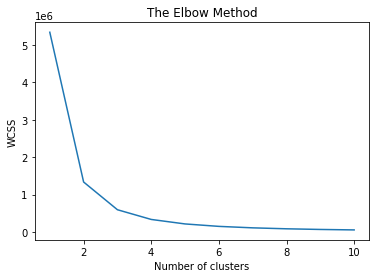

In [306]:
recomending.print_n_cluster()

In [307]:
a[~a.where(a['Answers'] == 2)['Answers'].isnull()]['Id'].values

array([  2,   7,   8,  11,  18,  23,  27,  30,  34,  44,  64,  69,  70,
        76,  87, 121, 135, 144, 145, 153, 157, 162, 170, 174, 176, 190,
       194, 196, 213, 219, 228, 232, 238, 240, 250, 253, 255, 266, 267,
       270, 277, 278, 282, 283, 284, 291, 304, 307, 315, 316, 323, 328,
       332, 334, 338, 348, 349, 358, 366, 368, 373, 374, 377, 385, 386,
       392, 396])